In [82]:
import pandas as pd
import numpy as np

## Joined tables!!

In [137]:
def get_data(label, time, criteria):
    df = pd.read_csv('data/{}/{}/{}.csv'.format(label, time, criteria))
    df['new_gender'] = df.columns[1]
    df['new_height'] = df.columns[3]

    # make the second line as header and drop the first line
    df.columns = df.iloc[0]

    # rename the last column name
    last_column_name = df.columns[-1]
    df = df.rename(columns={last_column_name: "height"})  

    # rename the second last column name
    second_last_column_name = df.columns[-2]
    df = df.rename(columns={second_last_column_name: "gender"})

    # drop the first line
    df = df.drop(df.index[0])
    # print(df.head())
    df.x = df.x.astype(float)
    df.y = df.y.astype(float)
    df.z = df.z.astype(float)
    df.height = df.height.astype(float)
    df.timestamp = df.timestamp.astype(float)

    # rename x,y,z to x_acceleration, y_acceleration, z_acceleration
    df = df.rename(columns={"x": "x_{}".format(criteria), "y": "y_{}".format(criteria), "z": "z_{}".format(criteria)})

    return df

In [138]:
# Get all the folder name under abnormal arm swing
# Path: abnormal_arm_swing
import os
path = 'data/'
labels = os.listdir(path)
# print(labels)
for label in labels:
    if label == '.DS_Store':
        continue
    label_path = path + label
    print(label_path)
    files = os.listdir(label_path)

    for file in files:
        if file == '.DS_Store':
            continue
        print(file)
        df_acc = get_data(label, file, 'accelerometer')
        df_gyro = get_data(label, file, 'gyroscope')
        # if data is empty, skip
        if (df_acc.shape[0] == 0 or df_gyro.shape[0] == 0):
            continue
        # join two tables together, using timestamp as the key
        df = pd.merge(df_acc, df_gyro, on=['timestamp', 'gender', 'height'], how='outer')
        # replace NaN with the previous value (as the value is continuous)
        df_res = df.fillna(method='ffill')
        # fill other NaN with 0
        df_res = df_res.fillna(0)
        # if timestamp is the same, only get last row
        df_res = df_res.drop_duplicates(subset=['timestamp'], keep='last')
        # get the first timestamp
        first_timestamp = df_res['timestamp'].iloc[0]
        # get the last timestamp
        last_timestamp = df_res['timestamp'].iloc[-1]
        # remove entries in the first and last 5 seconds
        df_res = df_res[df_res['timestamp'] > first_timestamp + 5000]
        df_res = df_res[df_res['timestamp'] < last_timestamp - 5000]
        
        # save the result to csv
        df_res.to_csv('reformated_data/{}/{}_{}.csv'.format(label, file, 'result'), index=False)
        # print(df_res.describe())
        # print()

data/good_running_posture
1699918813992
1700458989471
1700299659652
1700299748140
1699942129172
1699869318151
1700299839543
1699869406030
1699720588277
1699941957565
1699864647306
1699722124293
1699720726606
1700459077151
1700134452893
1699942037539
1700133420179
1700133334140
1700197635339
1700197423477
1700133336390
data/abnormal_upper_body
1699943036090
1699846694858
1700134049103
1700460211009
1699943258209
1700460369853
1700300807544
1699943133398
1700460495277
1700199618002
1700301084969
1700134978264
1700135063097
1700134167626
1700199265739
1700300995934
1700199518578
1700460583088
1699722315502
1700300891125
1699943488682
data/abnormal_arm_swing
1700198380046
1700299976008
1700198009640
1699943632083
1700197870187
1700051596152
1700134584694
1699943939308
1700300268849
1700459572715
1700459396514
1700300064699
1700051475152
1699943813895
1700198288693
1699943699779
1700300182508
1699718394246
1700133673276
1700459313497
1700134671764
data/abnormal_stride
1700459920901
17001985

## Analyze data

In [139]:
import glob
def get_unified_dataset(label):
    path = 'reformated_data/{}/'.format(label)
    all_files = glob.glob(path + "*.csv")
    li = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)
    df = pd.concat(li, axis=0, ignore_index=True)
    return df

In [127]:
# Draw histograms for accelerometer and gyroscope
import matplotlib.pyplot as plt
import seaborn as sns
def get_general_histogram(title, df, criteria):
    sns.set()
    plt.figure(figsize=(15, 6))
    plt.subplot(3, 1, 1)
    plt.hist(df['x_{}'.format(criteria)], bins=100)
    plt.title('x_{}'.format(criteria))
    plt.subplot(3, 1, 2)
    plt.hist(df['y_{}'.format(criteria)], bins=100)
    plt.title('y_{}'.format(criteria))
    plt.subplot(3, 1, 3)
    plt.hist(df['z_{}'.format(criteria)], bins=100)
    plt.title('z_{}'.format(criteria))
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [132]:
# Draw the accelerator histograms for each gender
def get_gender_histo_graphs(df, label, criteria):
    df_female = df[df['gender'] == 'Female']
    df_male = df[df['gender'] == 'Male']

    female_graph_title = label + " - " + criteria + ": Female"
    male_graph_title = label + " - " + criteria + ": Male"

    get_general_histogram(male_graph_title, df_male, criteria)
    get_general_histogram(female_graph_title, df_female, criteria)    

### Unified good running posture

In [140]:
unified_good_running_posture = get_unified_dataset('good_running_posture')
unified_good_running_posture

,timestamp,x_accelerometer,y_accelerometer,z_accelerometer,gender,height,x_gyroscope,y_gyroscope,z_gyroscope
0,1.700133e+12,9.167398,-0.835576,-6.433220,Female,155.0,1.367117,-0.553444,-5.605300
1,1.700133e+12,5.315128,2.420538,-2.523489,Female,155.0,1.367117,-0.553444,-5.605300
2,1.700133e+12,3.969586,7.273585,-1.278504,Female,155.0,5.619960,-1.412321,2.967583
3,1.700133e+12,7.680599,19.699492,-5.887342,Female,155.0,5.619960,-1.412321,2.967583
4,1.700133e+12,6.643910,41.556160,-6.193800,Female,155.0,5.619960,-1.412321,2.967583
...,...,...,...,...,...,...,...,...,...
17675,1.700300e+12,11.372458,2.518700,-1.352724,Male,165.0,-0.404393,-1.076345,-0.221133
17676,1.700300e+12,11.372458,2.518700,-1.352724,Male,165.0,-0.257785,-0.729373,-0.659735
17677,1.700300e+12,11.372458,2.518700,-1.352724,Male,165.0,0.282220,0.138056,-0.612087
17678,1.700300e+12,11.372458,2.518700,-1.352724,Male,165.0,0.217468,0.129503,-0.361632


In [141]:
# remove data with height < 140
unified_good_running_posture = unified_good_running_posture[unified_good_running_posture.height > 140]
# remove data with all xGyro, yGyro, zGyro = 0
unified_good_running_posture = unified_good_running_posture[(unified_good_running_posture.x_gyroscope != 0) | (unified_good_running_posture.y_gyroscope != 0) | (unified_good_running_posture.z_gyroscope != 0)]
# remove data with all xAcc, yAcc, zAcc = 0
unified_good_running_posture = unified_good_running_posture[(unified_good_running_posture.x_accelerometer != 0) | (unified_good_running_posture.y_accelerometer != 0) | (unified_good_running_posture.z_accelerometer != 0)]
unified_good_running_posture.describe()

,timestamp,x_accelerometer,y_accelerometer,z_accelerometer,height,x_gyroscope,y_gyroscope,z_gyroscope
count,1.764300e+04,17643.000000,17643.000000,17643.000000,17643.000000,17643.000000,17643.000000,17643.000000
mean,1.700014e+12,-5.217868,-16.616891,0.173045,167.793459,-0.347862,0.143228,-0.052667
std,1.380631e+08,11.229520,22.559914,6.905872,8.384857,2.533718,3.290275,3.410958
min,1.699720e+12,-76.999920,-78.443630,-48.427517,155.000000,-12.874596,-21.934950,-34.377052
25%,1.699942e+12,-13.669695,-23.366211,-5.384560,155.000000,-1.861306,-2.239432,-2.162463
50%,1.699942e+12,-6.335058,-9.016563,0.067038,174.000000,-0.246790,0.035430,0.039095
75%,1.700133e+12,4.214992,-1.183933,5.890933,174.000000,1.086118,2.370768,1.538770
max,1.700459e+12,47.764324,42.157104,32.302570,174.000000,31.898160,24.887873,16.522684


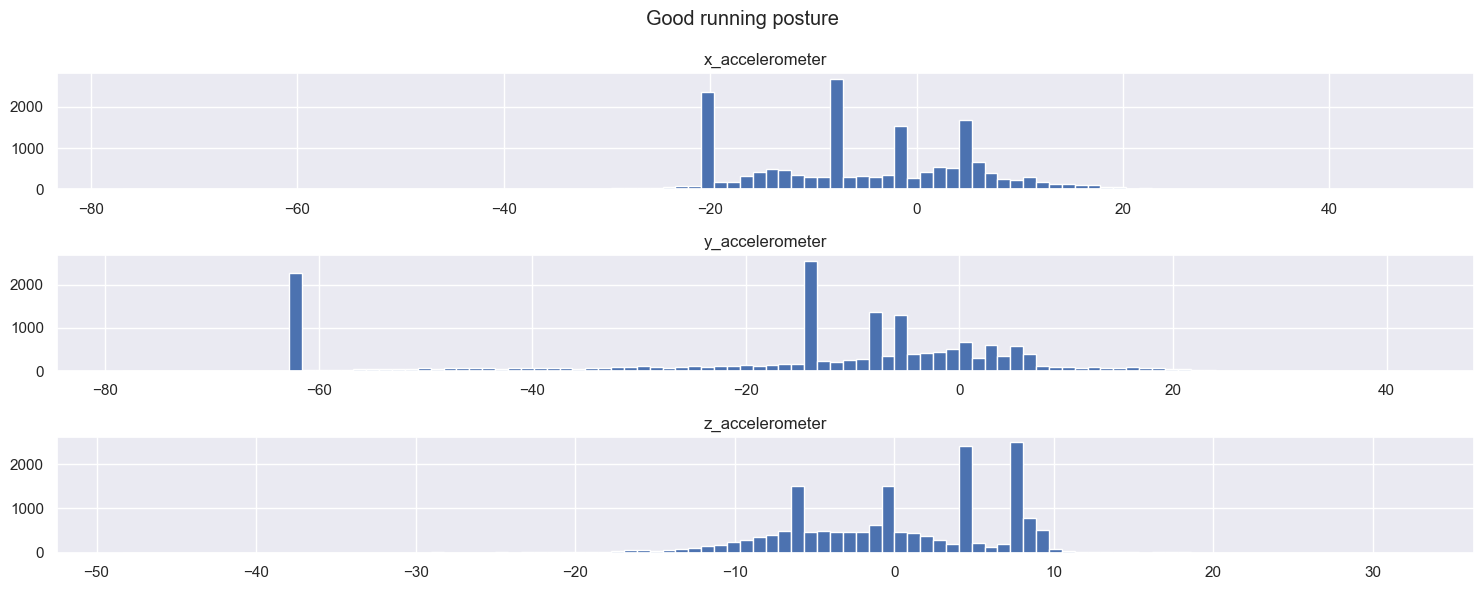

In [142]:
get_general_histogram('Good running posture', unified_good_running_posture, 'accelerometer')

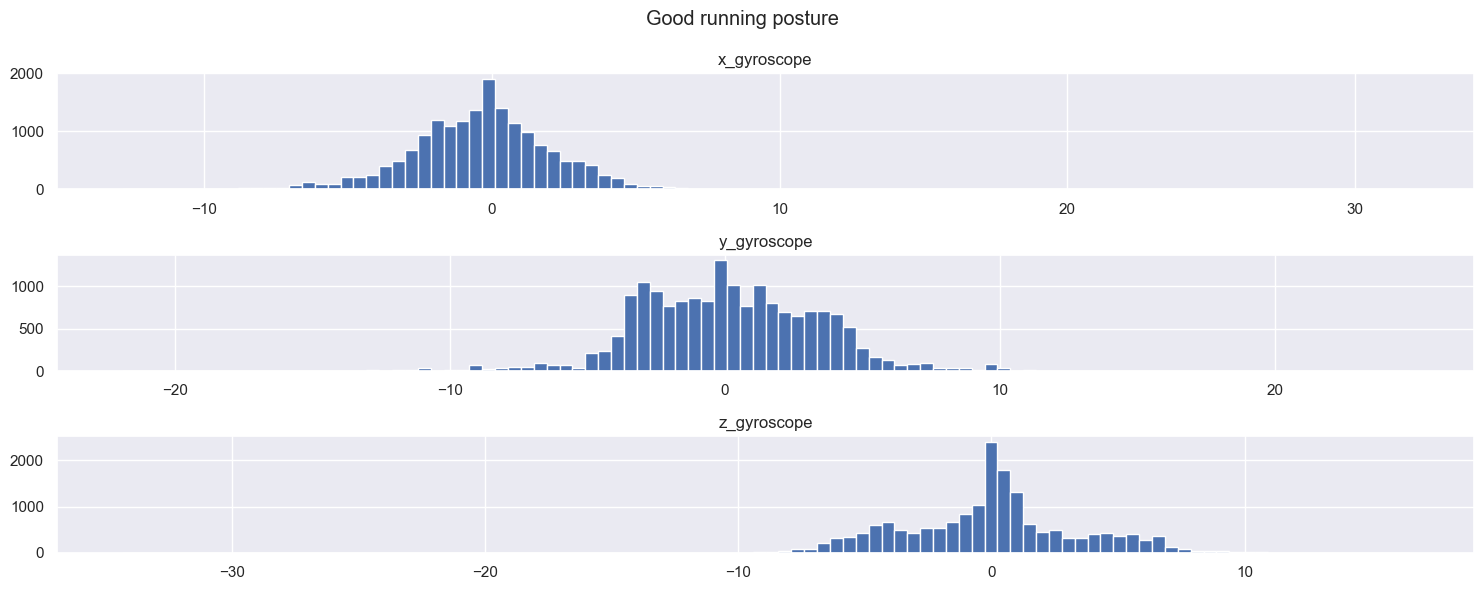

In [143]:
get_general_histogram('Good running posture', unified_good_running_posture, 'gyroscope')

##### Gender

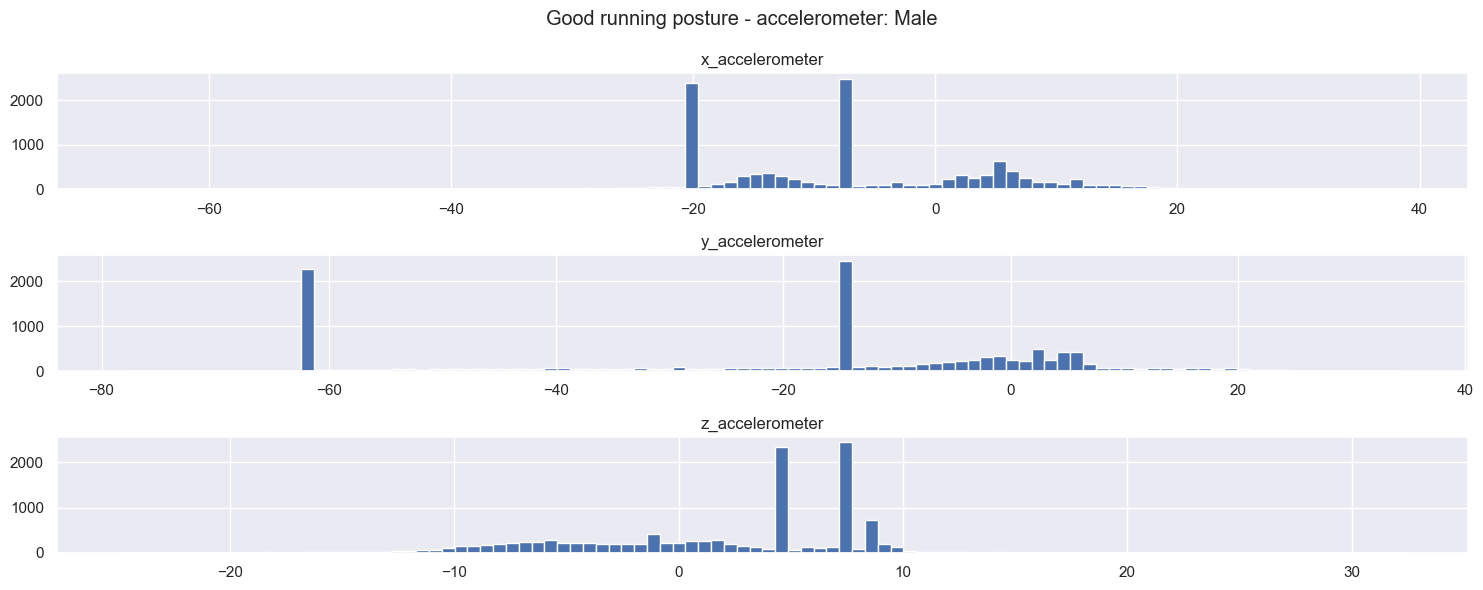

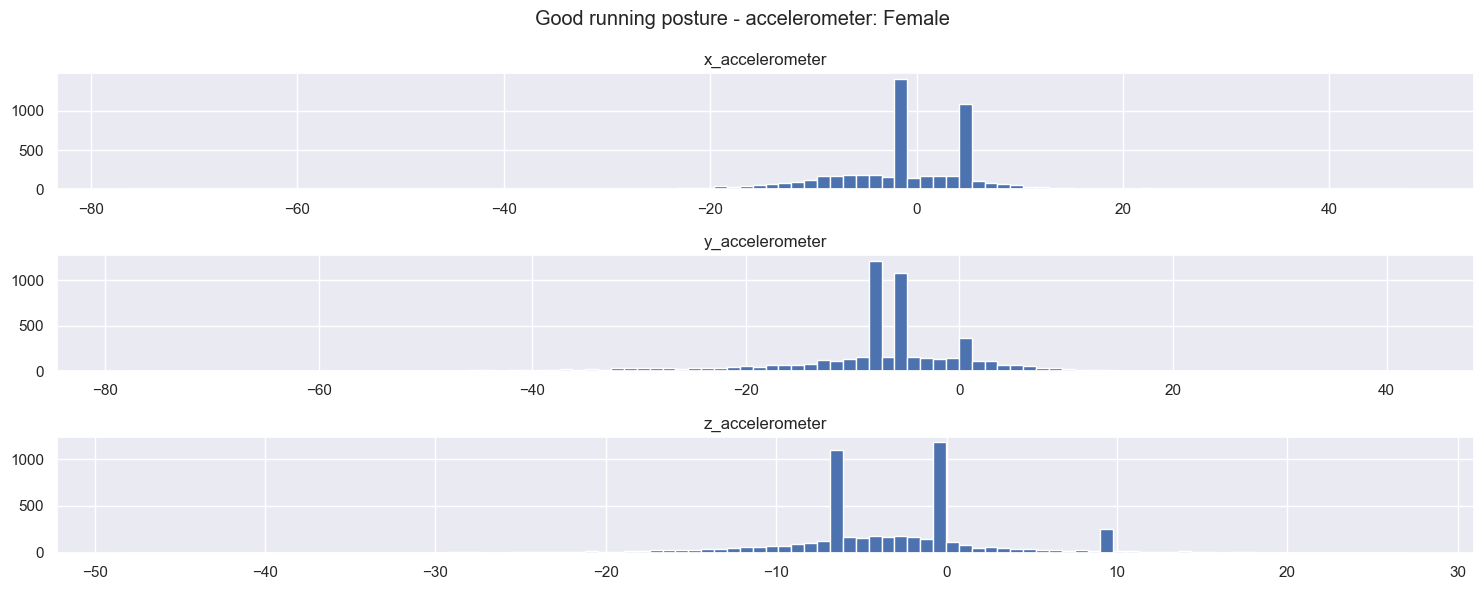

In [144]:
get_gender_histo_graphs(unified_good_running_posture, 'Good running posture', 'accelerometer')

In general, the accelerator data between two genders shows similar range. However, the male's y-axis data has strange outliers around -60 (???)

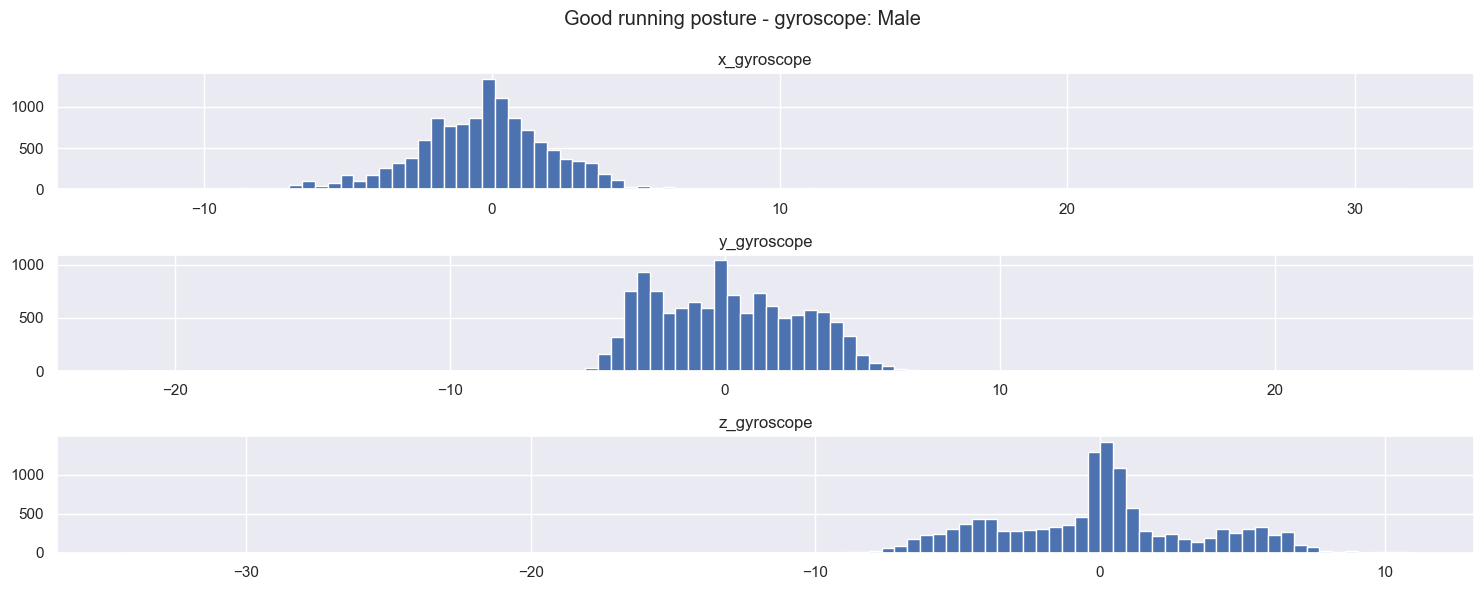

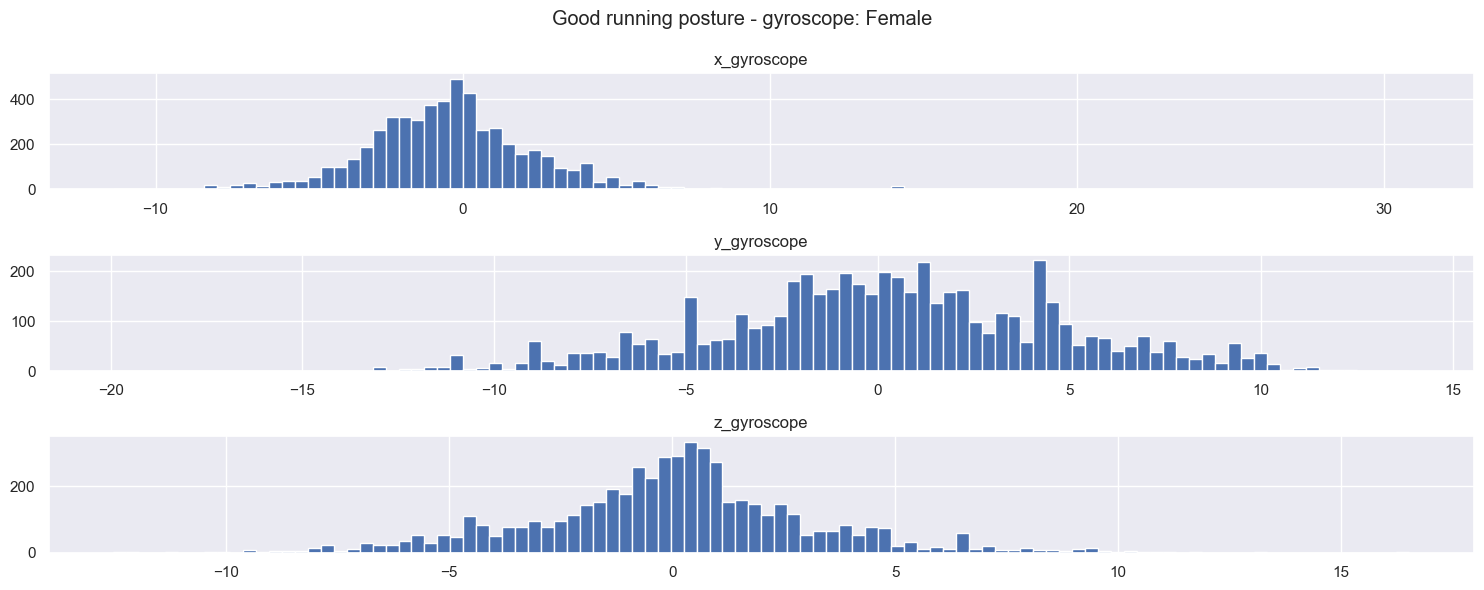

In [145]:
get_gender_histo_graphs(unified_good_running_posture, 'Good running posture', 'gyroscope')

Similarly, the two graphs display a similar pattern.

### Unified abnormal arm swing

In [147]:
unified_abnormal_arm = get_unified_dataset('abnormal_arm_swing')
unified_abnormal_arm.describe()

,timestamp,x_accelerometer,y_accelerometer,z_accelerometer,height,x_gyroscope,y_gyroscope,z_gyroscope
count,2.990700e+04,29907.000000,29907.000000,29907.000000,29907.000000,29907.000000,29907.000000,29907.000000
mean,1.700024e+12,-5.616570,-8.267803,-0.716976,168.673488,-0.251591,0.367751,-0.038465
std,1.439848e+08,12.783374,13.930240,7.261748,8.076377,3.350093,2.683525,4.628346
min,1.699718e+12,-78.443630,-78.443630,-57.690685,155.000000,-26.129150,-23.010073,-22.209839
25%,1.699944e+12,-8.777143,-12.054806,-4.268862,160.000000,-1.904678,-1.379334,-2.930931
50%,1.699944e+12,-3.205836,-8.628703,-0.976834,174.000000,-0.145386,0.015882,-0.118508
75%,1.700134e+12,3.670311,2.219425,3.623624,174.000000,1.639562,1.748907,2.495384
max,1.700459e+12,44.821850,53.879116,77.605650,174.000000,35.789370,23.236092,32.809574


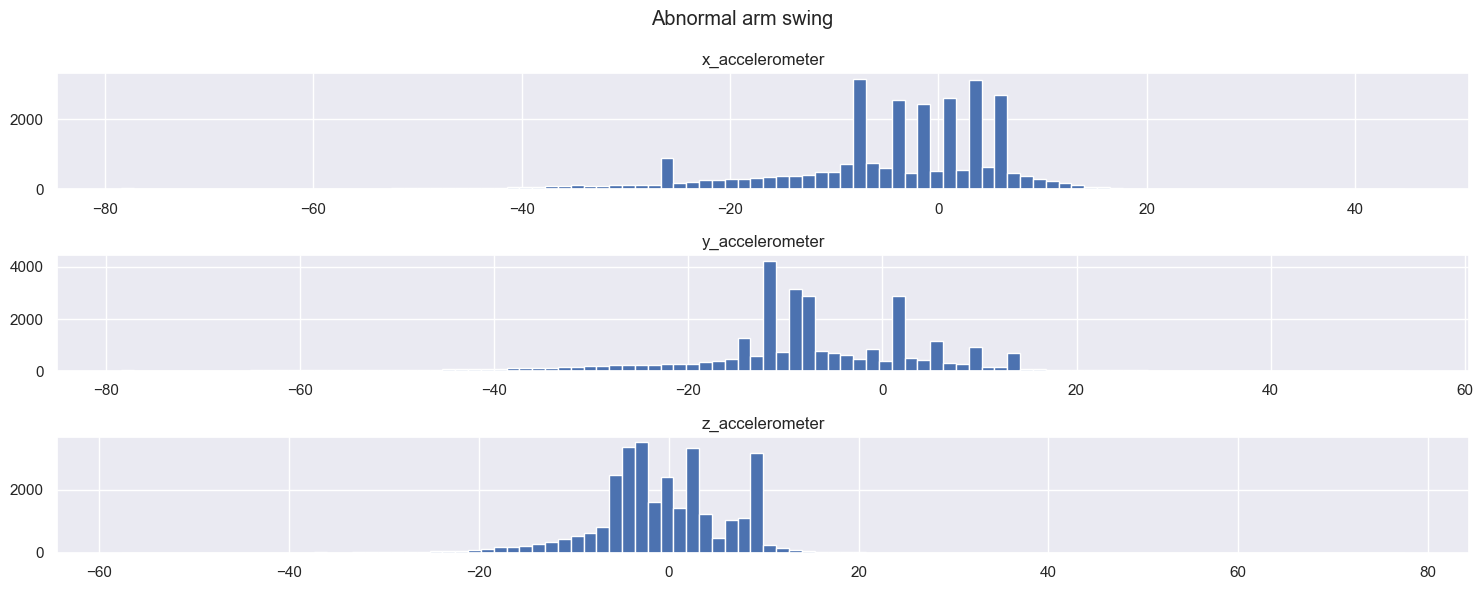

In [150]:
get_general_histogram('Abnormal arm swing', unified_abnormal_arm, 'accelerometer')

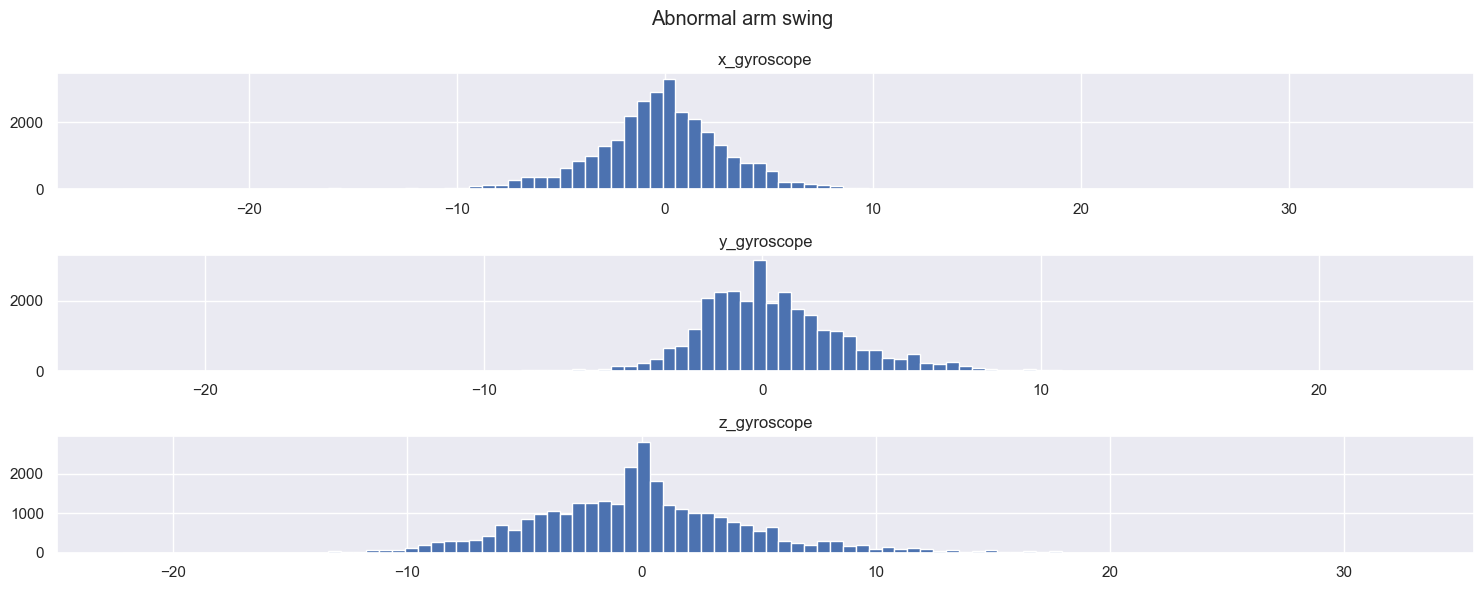

In [151]:
get_general_histogram('Abnormal arm swing', unified_abnormal_arm, 'gyroscope')

#### Gender

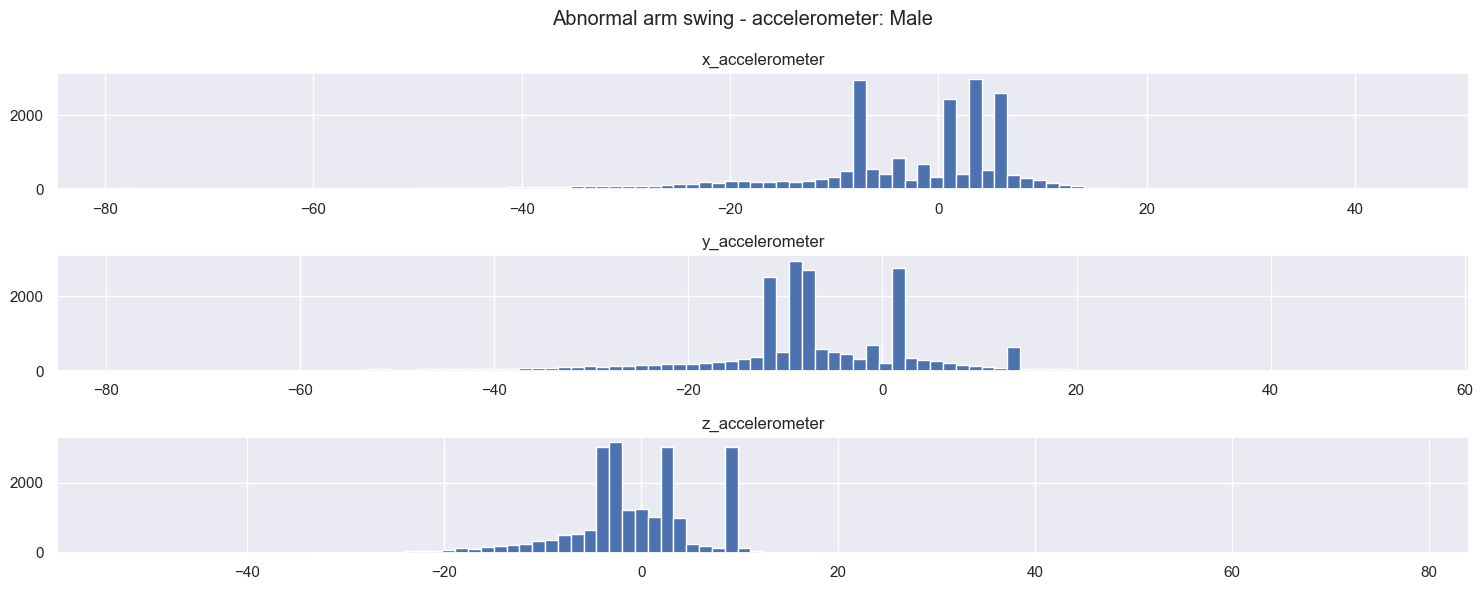

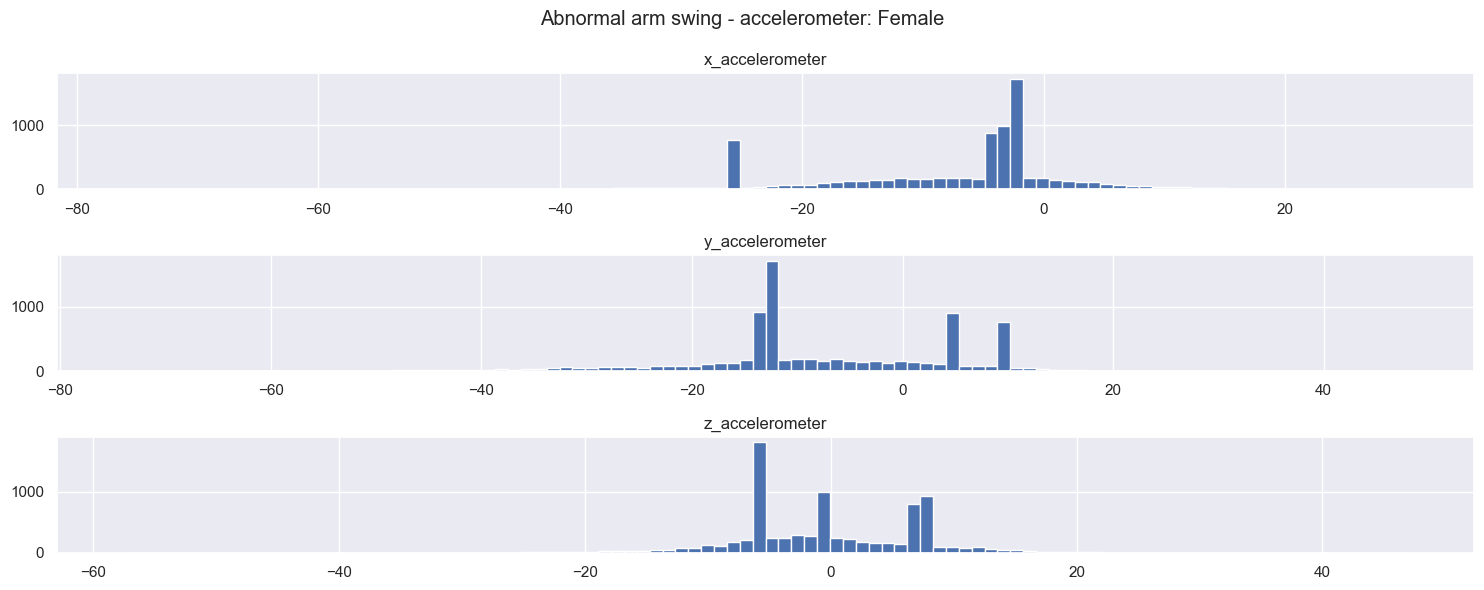

In [148]:
get_gender_histo_graphs(unified_abnormal_arm, 'Abnormal arm swing', 'accelerometer')

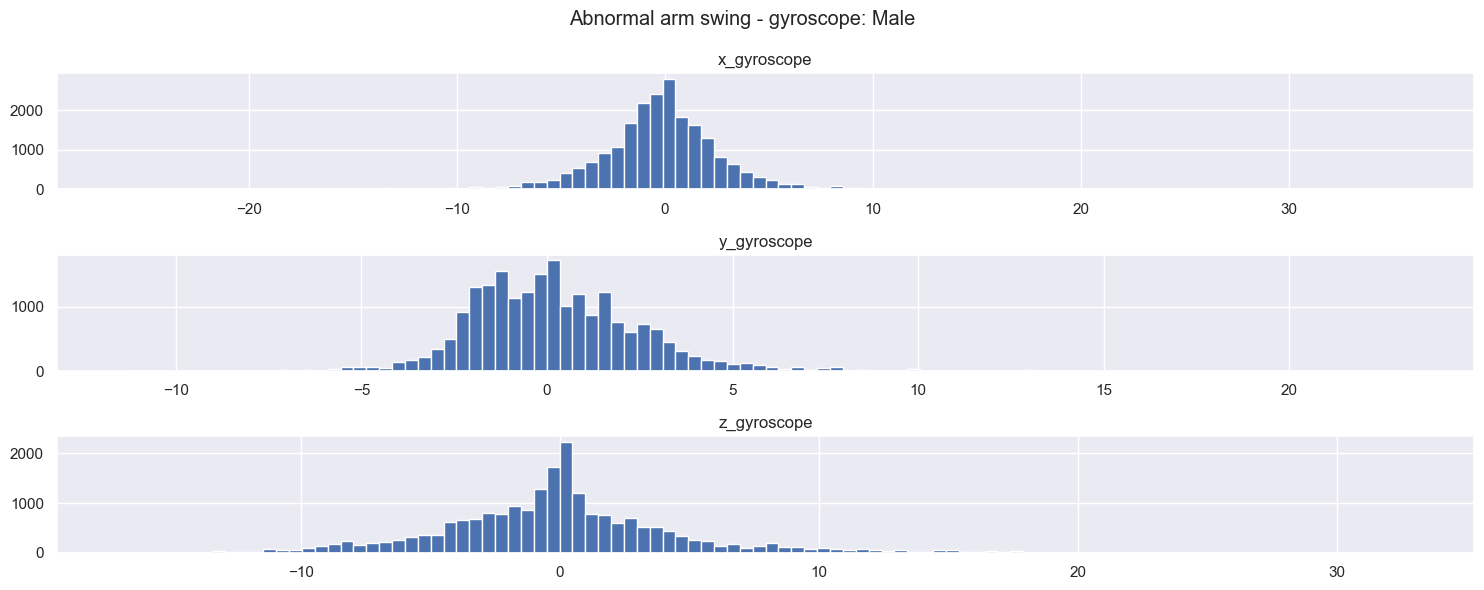

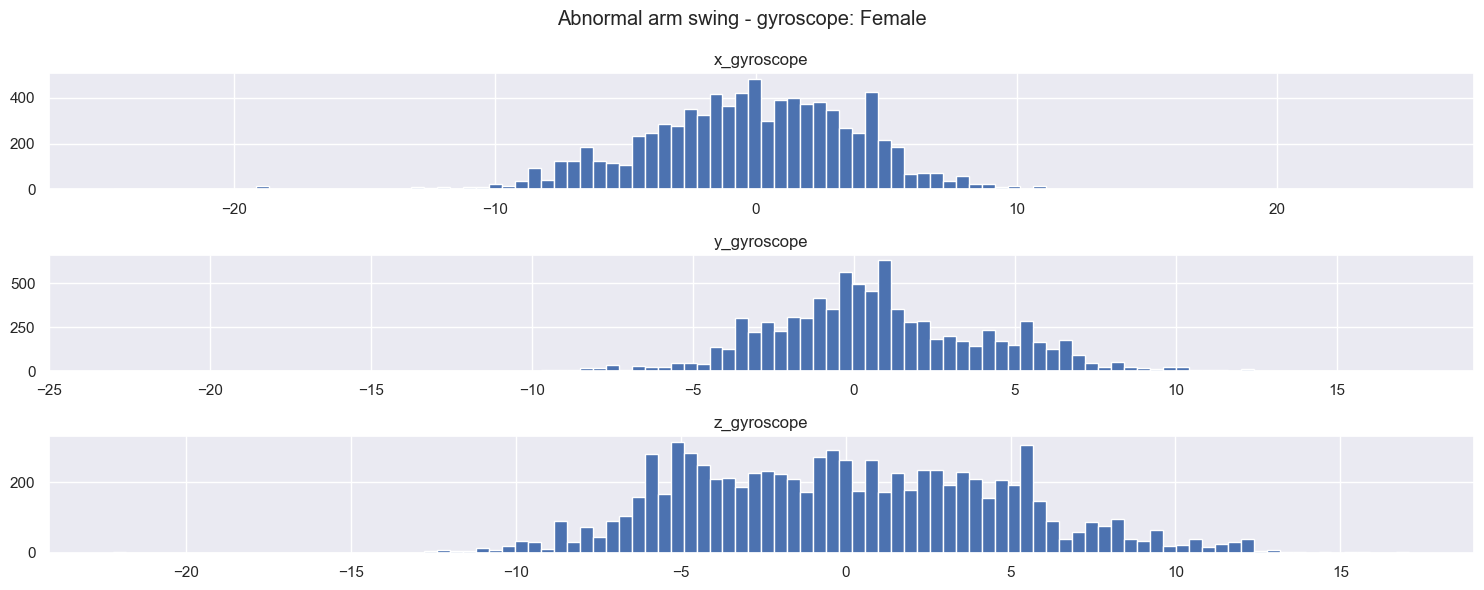

In [149]:
get_gender_histo_graphs(unified_abnormal_arm, 'Abnormal arm swing', 'gyroscope')

### Unified abnormal stride

In [152]:
unified_abnormal_stride = get_unified_dataset('abnormal_stride')
unified_abnormal_stride.describe()

,timestamp,x_accelerometer,y_accelerometer,z_accelerometer,height,x_gyroscope,y_gyroscope,z_gyroscope
count,3.379400e+04,33794.000000,33794.000000,33794.000000,33794.000000,33794.000000,33794.000000,33794.000000
mean,1.700055e+12,-9.658049,-10.844028,-1.915973,169.109931,-0.033638,0.410857,0.031407
std,1.181348e+08,16.853616,14.955867,7.910391,7.171786,3.637780,2.946984,6.448043
min,1.699942e+12,-78.443630,-78.443630,-68.423890,155.000000,-26.654493,-13.623517,-17.215405
25%,1.699943e+12,-23.683443,-18.064250,-5.032612,170.000000,-1.931556,-1.584585,-3.980398
50%,1.699943e+12,-3.699042,-8.281544,-1.493982,174.000000,0.054978,0.310320,-0.136834
75%,1.700199e+12,1.206678,-3.541024,2.451064,174.000000,1.903151,2.373823,2.726903
max,1.700301e+12,66.721610,78.395740,37.524323,174.000000,20.322266,34.662937,22.237938


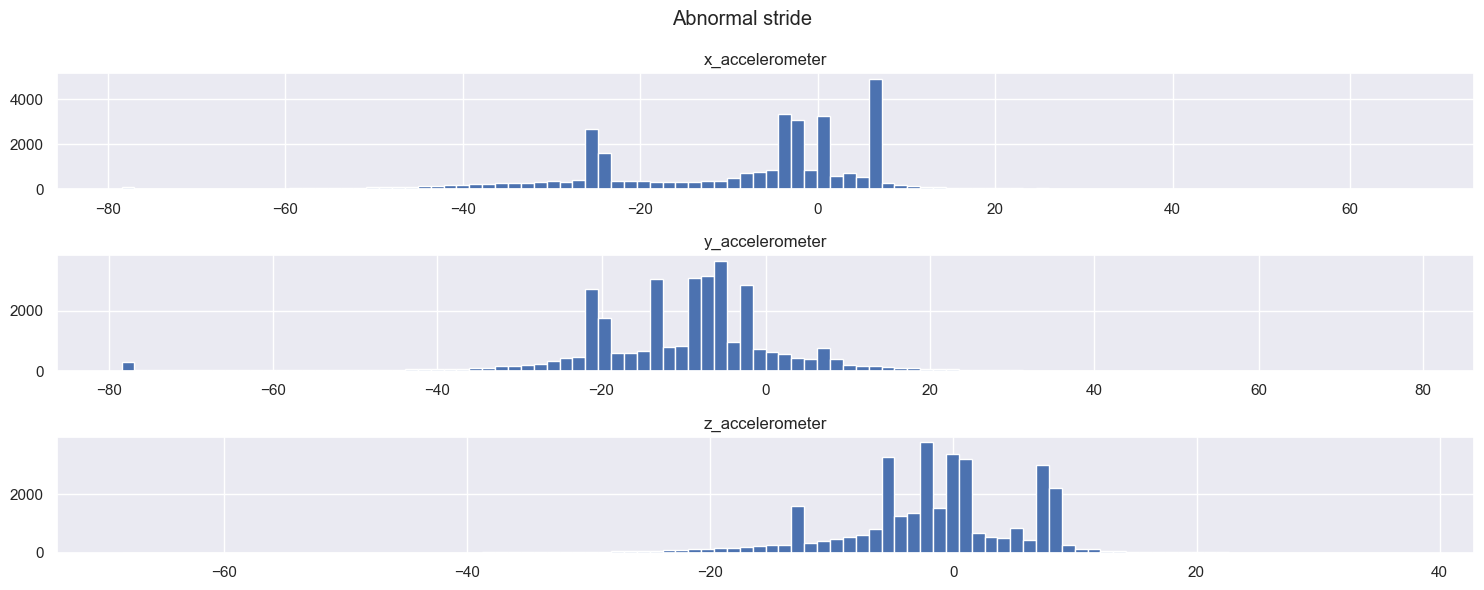

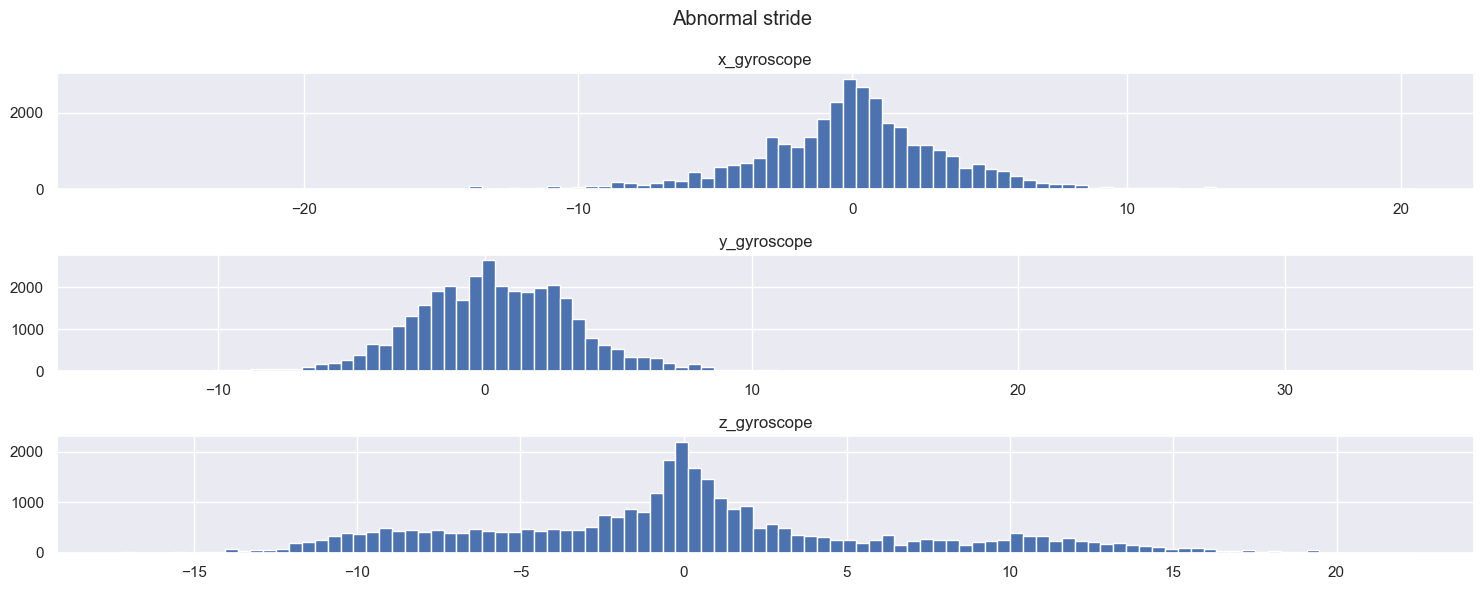

In [153]:
# General
get_general_histogram('Abnormal stride', unified_abnormal_stride, 'accelerometer')
get_general_histogram('Abnormal stride', unified_abnormal_stride, 'gyroscope')

#### Gender

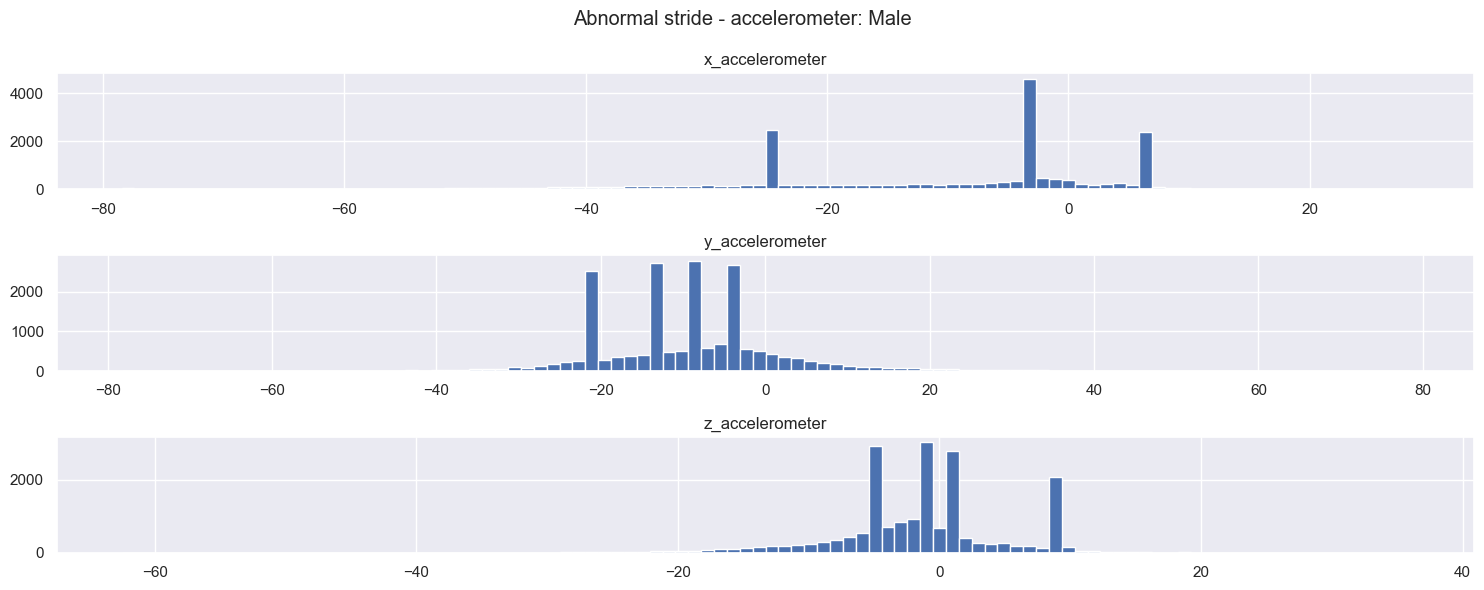

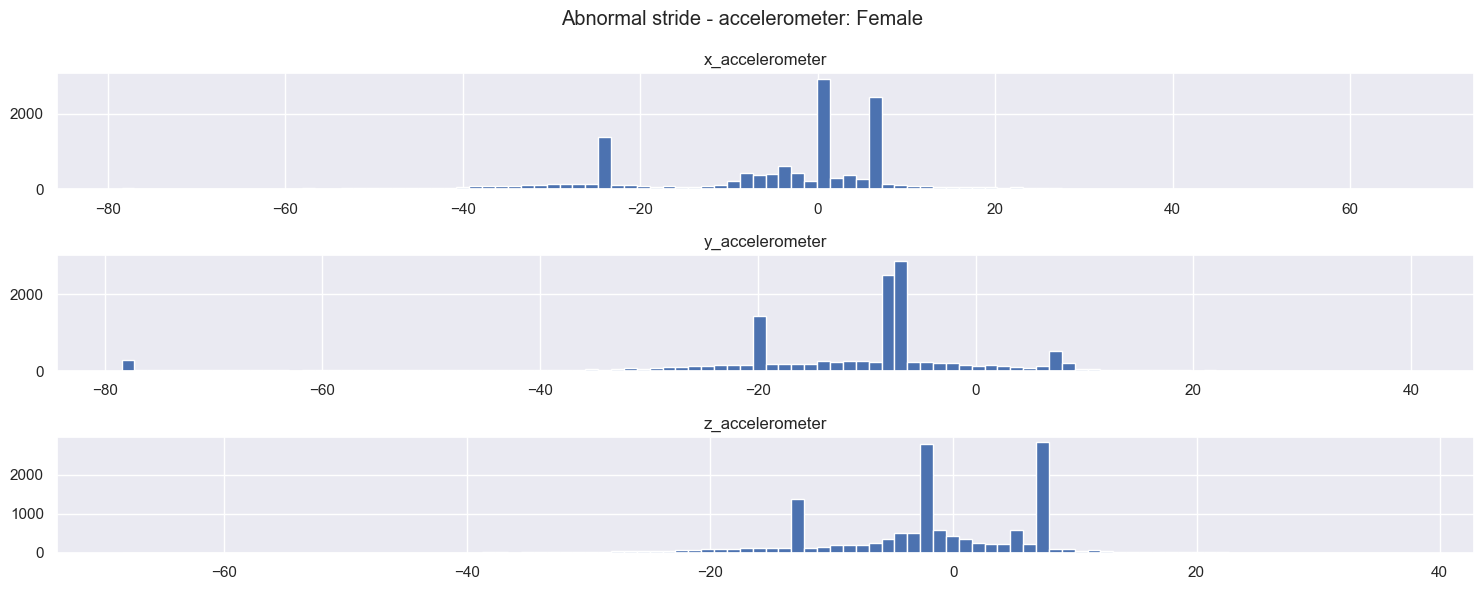

In [154]:
get_gender_histo_graphs(unified_abnormal_stride, 'Abnormal stride', 'accelerometer')

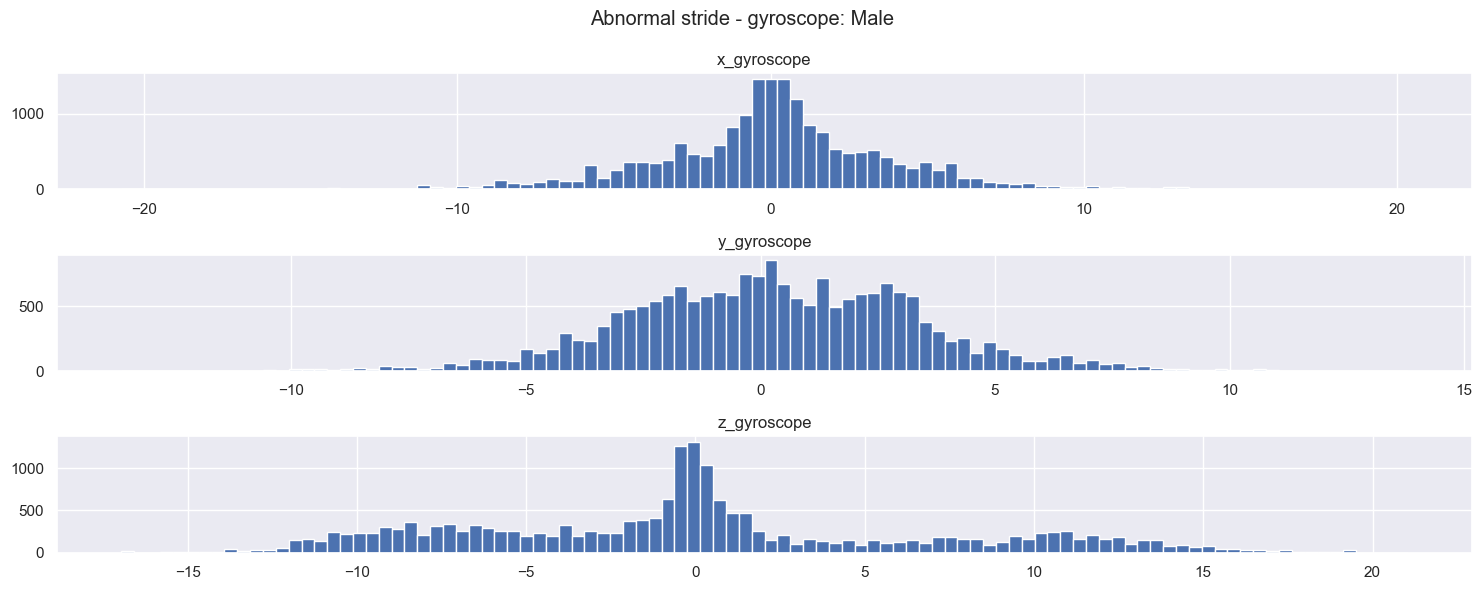

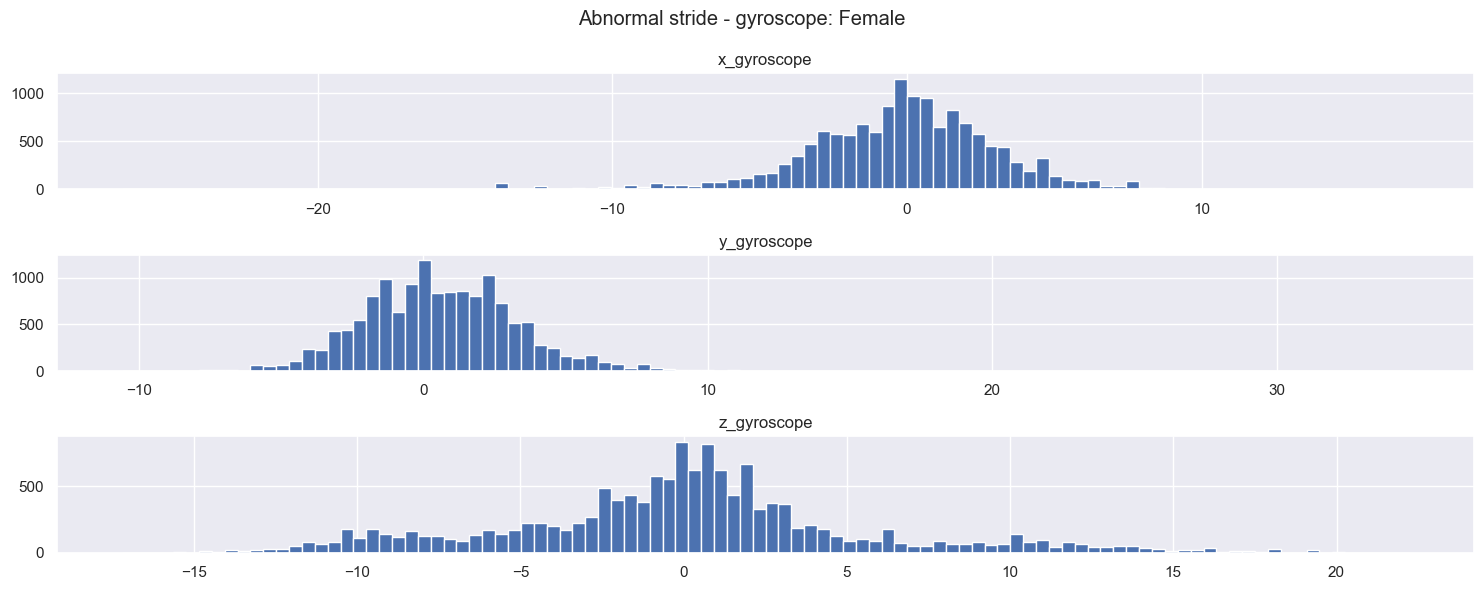

In [155]:
get_gender_histo_graphs(unified_abnormal_stride, 'Abnormal stride', 'gyroscope')

### Unified abnormal upper body

In [156]:
unifed_abnormal_upper_body = get_unified_dataset('abnormal_upper_body')
unifed_abnormal_upper_body.describe()

,timestamp,x_accelerometer,y_accelerometer,z_accelerometer,height,x_gyroscope,y_gyroscope,z_gyroscope
count,2.525400e+04,25254.000000,25254.000000,25254.000000,25254.000000,25254.000000,25254.000000,25254.000000
mean,1.700035e+12,-4.342012,-9.513865,-1.603924,167.380692,-0.303038,0.163131,-0.095711
std,1.188618e+08,12.272114,13.611575,6.781718,8.539848,2.708238,2.513232,3.895958
min,1.699847e+12,-78.443630,-78.443630,-60.963560,155.000000,-24.694838,-13.249667,-29.929953
25%,1.699943e+12,-14.235325,-12.389994,-3.966594,155.000000,-1.918117,-1.452638,-2.590069
50%,1.699943e+12,-1.416170,-8.204929,-1.527501,174.000000,-0.235794,0.162490,-0.259007
75%,1.700134e+12,5.568913,-3.588908,0.950498,174.000000,1.372920,1.706757,1.930334
max,1.700460e+12,51.018044,53.199160,37.478832,174.000000,15.366926,19.048000,38.929222


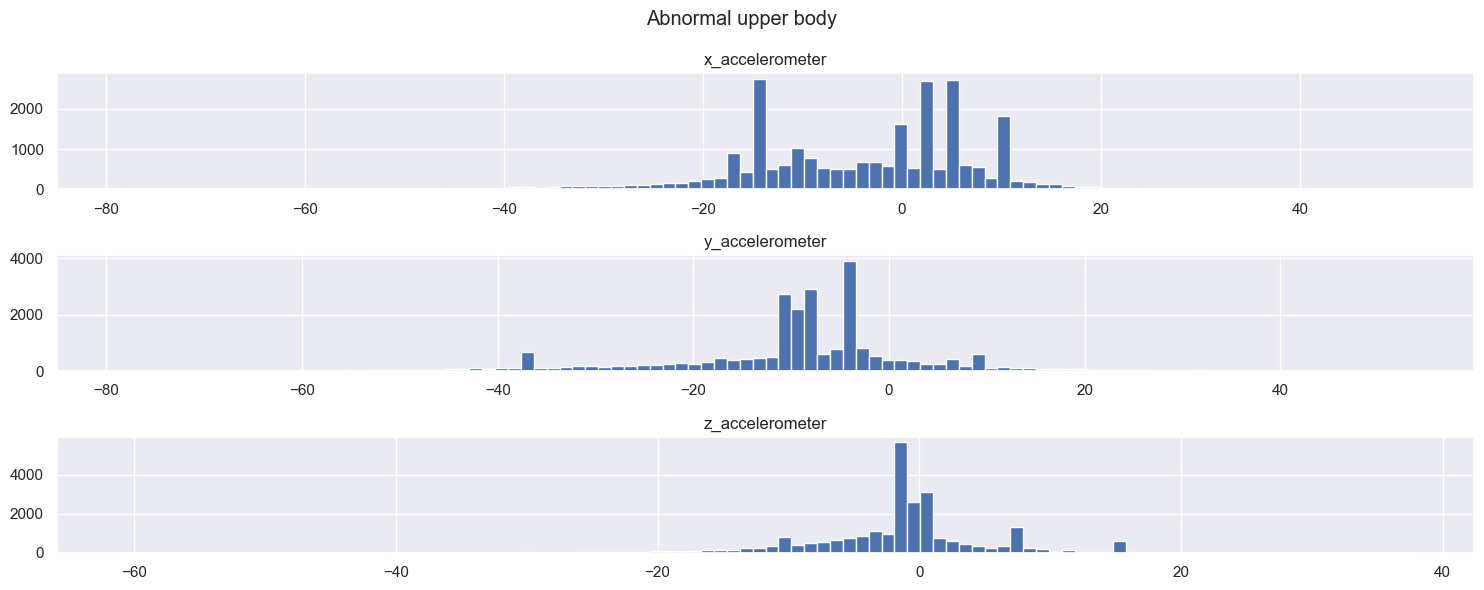

In [157]:
# General
get_general_histogram('Abnormal upper body', unifed_abnormal_upper_body, 'accelerometer')

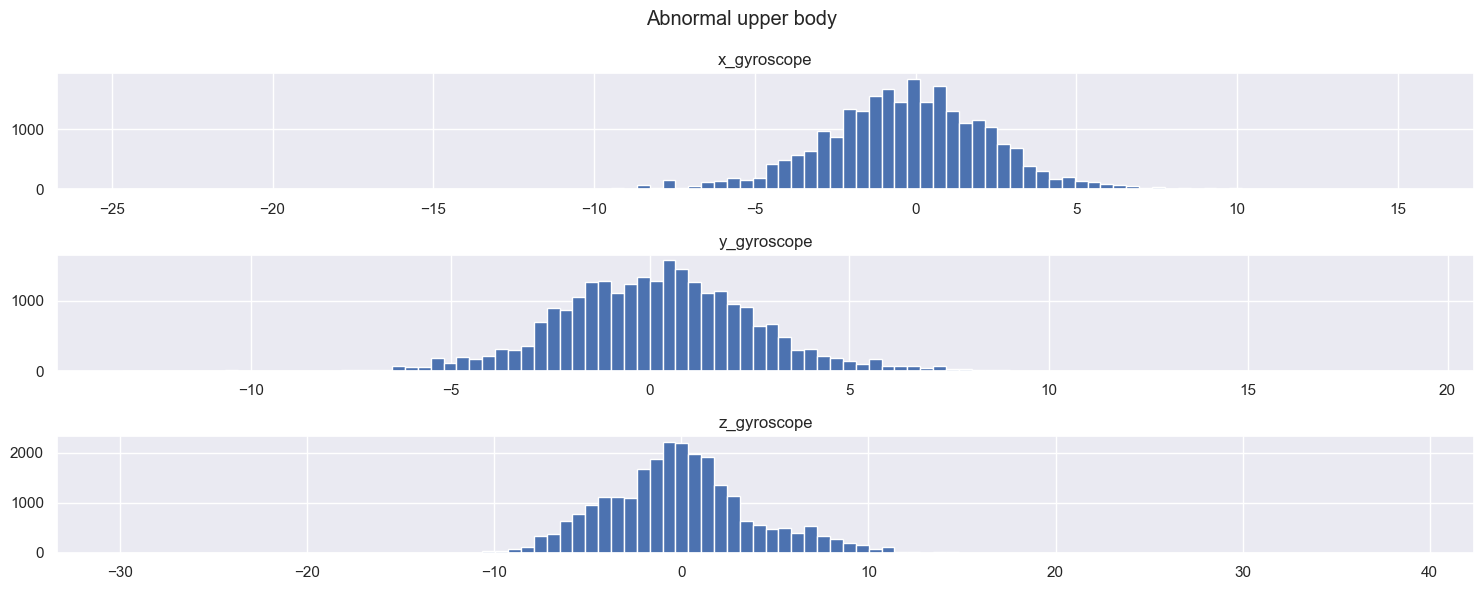

In [158]:
get_general_histogram('Abnormal upper body', unifed_abnormal_upper_body, 'gyroscope')

#### Gender

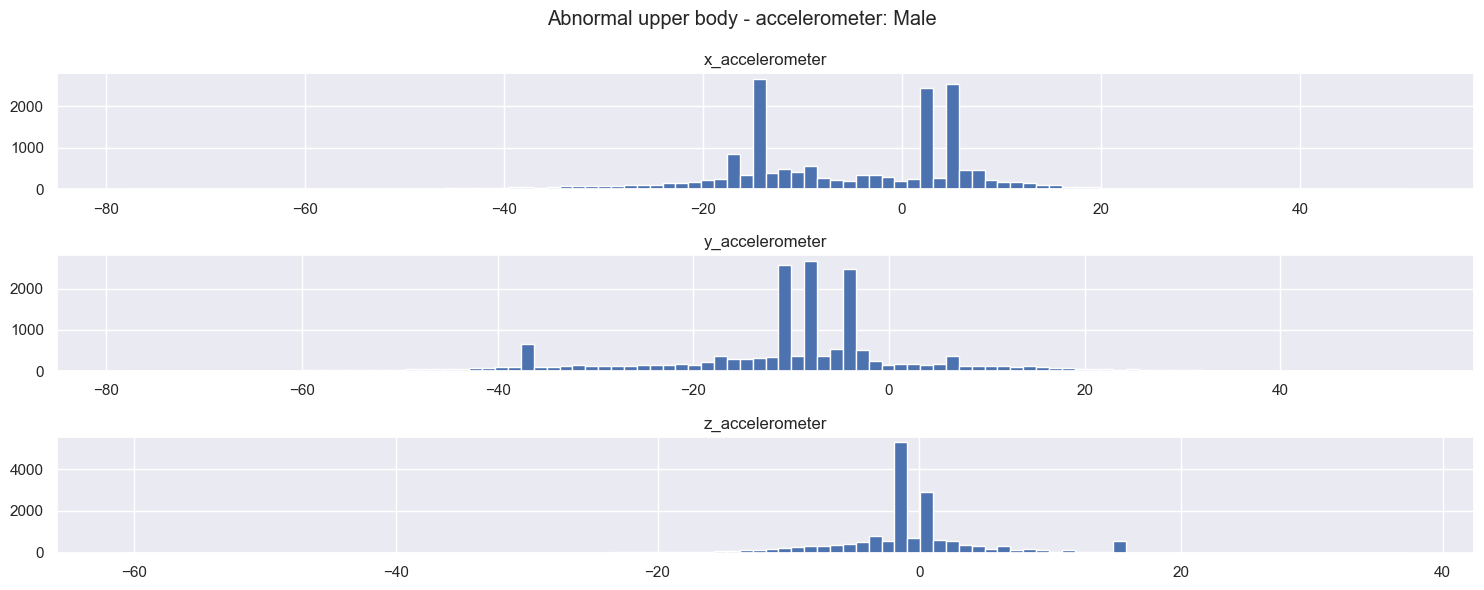

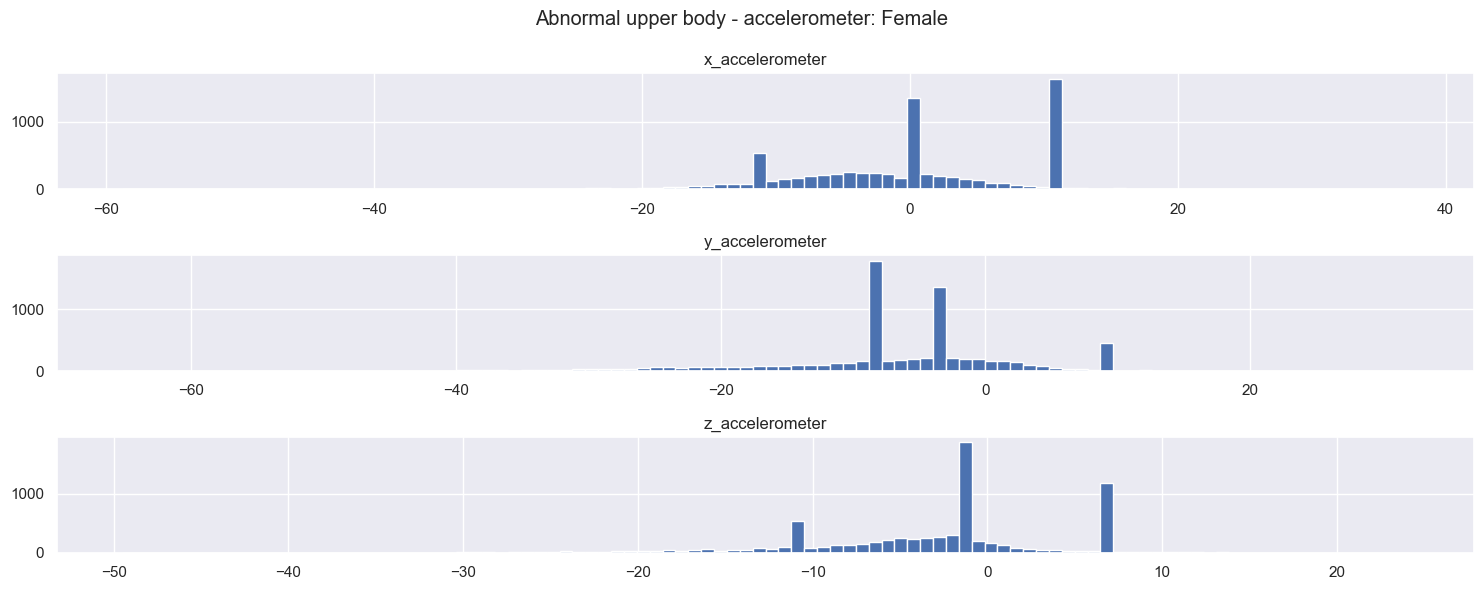

In [159]:
get_gender_histo_graphs(unifed_abnormal_upper_body, 'Abnormal upper body', 'accelerometer')

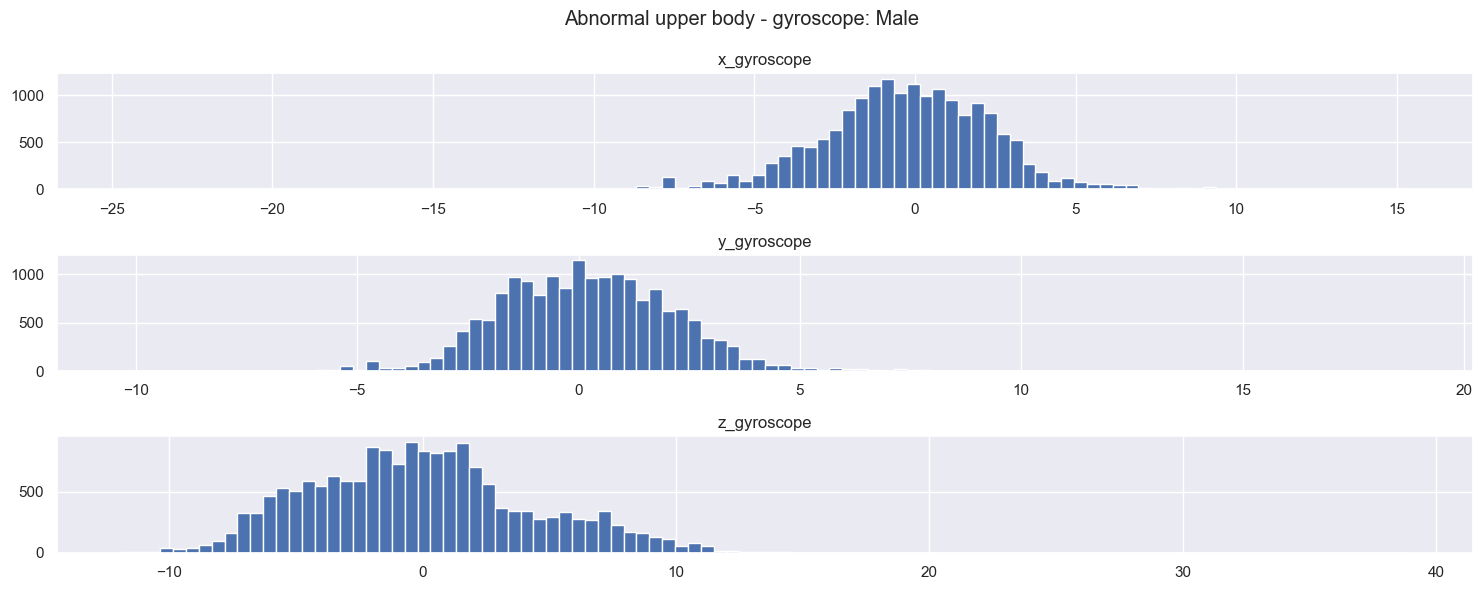

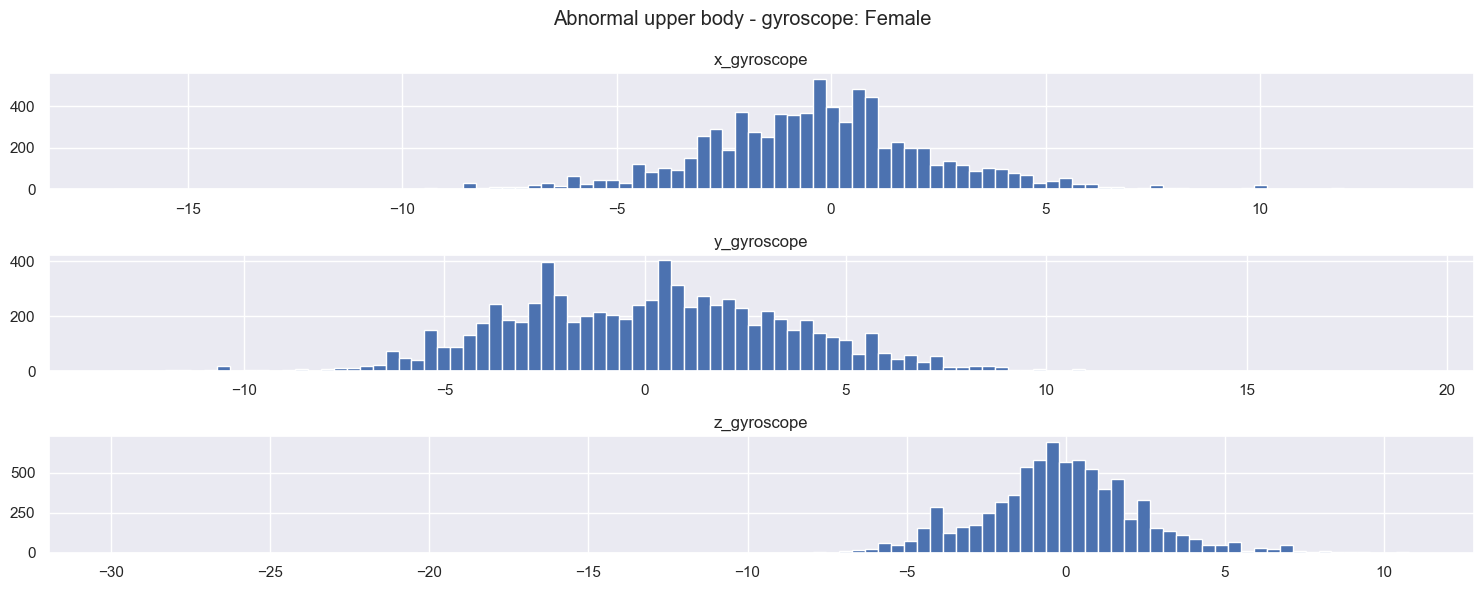

In [160]:
get_gender_histo_graphs(unifed_abnormal_upper_body, 'Abnormal upper body', 'gyroscope')